In [15]:
import pandas as pd
import spacy as sy
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jqi22\AppData\Roaming\nltk_data...


True

In [3]:
word=pd.read_csv(r"abcnews-date-text.csv", parse_dates=[0], infer_datetime_format=True)

In [4]:
word.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [5]:
dup_index=word.duplicated(subset=["headline_text"], keep=0)
sectrain, dup_res=word.loc[dup_index==False, :], word[dup_index]
sectrain.duplicated(subset=["headline_text"], keep=0).sum()

0

C:\Users\jqi22\AppData\Local\Temp\ipykernel_10748\3263514169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectrain.loc[:,'numwords'] = sectrain.loc[:, 'headline_text'].apply(lambda x: len(x.split()))


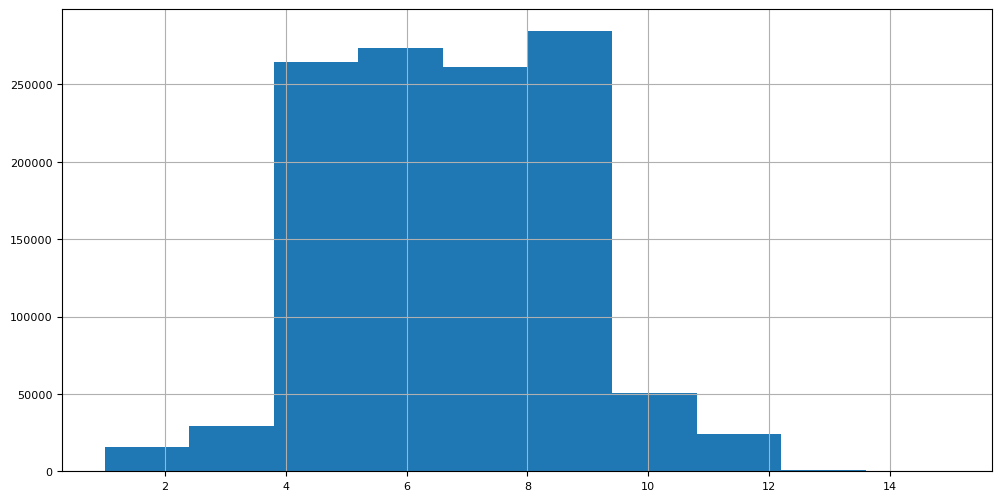

In [6]:
sectrain.loc[:,'numwords'] = sectrain.loc[:, 'headline_text'].apply(lambda x: len(x.split()))
sectrain["numwords"].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);

##### stop words padding

In [7]:
# Create a CountVectorizer object with English stop words
vectorizer = CountVectorizer(stop_words="english")
# Get the list of stop words
stop_words = set(vectorizer.get_stop_words())

In [8]:
nlp=sy.load("en_core_web_sm")
sy_stop=nlp.Defaults.stop_words

In [9]:
stop_words |= sy_stop

#### transform setence to signle word

In [10]:
wordtrain=sectrain.headline_text.str.split(expand=False)
wordtrain=wordtrain.explode().reset_index(drop=1)

In [11]:
stop_words|=set(wordtrain.value_counts()[:20].index)

#### use WordNetLemmatizer to filter out stopwords in title

In [13]:
def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [16]:
sectrain.loc[:, 'headline_cleaned_text']=sectrain['headline_text'].apply(clean_text)
sectrain.publish_date=sectrain.publish_date.dt.date

C:\Users\jqi22\AppData\Local\Temp\ipykernel_10748\2911573360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectrain['headline_cleaned_text']=sectrain['headline_text'].apply(clean_text)


In [27]:
# sectrain.iloc[900_000:, :].to_excel(r"data_clean_after_stopwords_900-rest.xlsx", index=False)